## DA 218o Worksheet 9: Sampling Techniques for Approximate Inferencing

In this workshop, we will look at various ways to perform efficient sampling. In most practical scenarios, the distributions are complex enough that it is difficult enough to sample from appropriately but they can often be evaluated at a certain point. The samples generated using these sampling techniques can be used to compute the approximate value of expectation or for approximate inferencing. In this workshop, we will see the following sampling techniques: 

 - Importance Sampling
 - Rejection Sampling
 
Markov Chain Monte Carlo (MCMC) Samplings

 - Metropolis-Hastings Sampling
 - Gibbs Sampling

In [3]:
import numpy as np
import random
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

### Importance Sampling 

Consider a scenario you are trying to calculate an expectation of function $f(x)$ , where $x \sim p(x)$ , subjected to some distribution. We have the following estimation of $E(f(x))$ :

$$E[f(x)] = \int f(x)p(x) dx \approx \frac{1}{n}\sum_{i} f(x_i)$$

Then, 

$$E[f(x)] = \int f(x)p(x) dx = \int f(x)\frac{p(x)}{q(x)}q(x) dx \approx \frac{1}{n} \sum_{i} f(x_i)\frac{p(x_i)}{q(x_i)}$$

where $ x \sim q(x)$

Idea of importance sampling: Draw the sample from a proposal distribution and re-weight the integral using importance weights so that the correct distribution is targeted. 

The variance of estimation:

$$Var(X) = E[X^2] - E[X]^2$$


which in this case, $X$ is $f(x)\frac{p(x)}{q(x)}$. So if $\frac{p(x)}{q(x)}$ is large, this will result in large variance, which we definitely hopes to avoid. On the other hand, it is also possible to select proper $q(x)$ that results in even smaller variance.

First, let’s define function $f(x)$ and sample distribution:


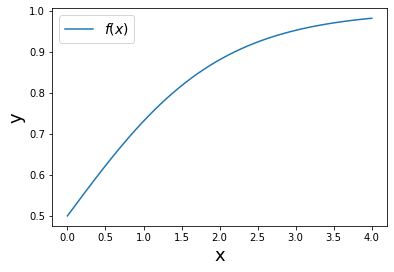

In [3]:
def f_x(x):
    return 1/(1 + np.exp(-x))

plt.figure(figsize=[6, 4])
x = np.linspace(0, 4, 50)  # x ranges from 0 to 4
y = [f_x(i) for i in x]

plt.plot(x, y, label="$f(x)$")

plt.xlabel("x", size=18)
plt.ylabel("y", size=18)
plt.legend(prop={"size": 14})

Now let’s define the distribution of $p(x)$ and $q(x)$:

In [5]:
def distribution(mu=0, sigma=1):
    # return probability given a value
    distribution = stats.norm(mu, sigma)
    return distribution

In [6]:
# pre-setting p(x) and q(x)
n = 5000

mu_target = 3.5
sigma_target = 1

mu_proposal = 1
sigma_proposal = 1

p_x = distribution(mu_target, sigma_target)
q_x = distribution(mu_proposal, sigma_proposal)

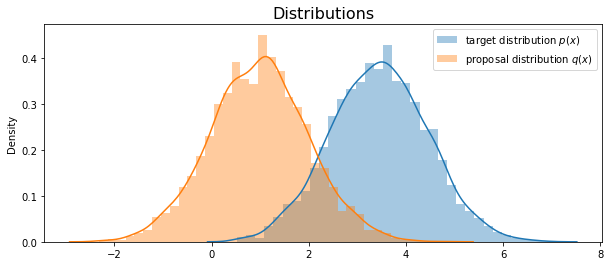

In [7]:
plt.figure(figsize=[10, 4])

sns.distplot([np.random.normal(mu_target, sigma_target) for _ in range(3000)], label="target distribution $p(x)$")
sns.distplot([np.random.normal(mu_proposal, sigma_proposal) for _ in range(3000)], label="proposal distribution $q(x)$")

plt.title("Distributions", size=16)
plt.legend()

In [8]:
# # calculate the true expected value sampled from distribution p(x)
s = 0
for i in range(n):
    # draw a sample
    x_i = np.random.normal(mu_target, sigma_target)
    s += f_x(x_i)
    
print("simulated expected value", s/n)

simulated expected value 0.9548052718660516


In [11]:
# calculate the approximted expected value by sampling from proposal (different) distribution

value_list = []
for i in range(n):
    # sample from different distribution
    x_i = np.random.normal(mu_proposal, sigma_proposal)
    value = f_x(x_i)*(p_x.pdf(x_i) / q_x.pdf(x_i))#fill code
    
    value_list.append(value)

print("average {} variance {}".format(np.mean(value_list), np.var(value_list)))

average 0.8760161093531377 variance 51.54840877686473


### Rejection Sampling (Accept- Reject Sampling)

### Target Distribution
Let $P(x) = 3e^{-\frac{x^2}{2}} + e^{-\frac{(x-4)^2}{2}}$ be the distribution we want to sample from. Note that this is an unnormalized distribution with a normalizing constant $NC$ we can compute but let's keep it as it is.     
($NC \approx 10.0261955464$)

NC can be computed from here: https://www.wolframalpha.com/input?i2d=true&i=integral+of+3Power%5Be%2C-Divide%5BPower%5Bx%2C+2%5D%2C2%5D%5D%2B+Power%5Be%2C+Divide%5B-Power%5B%5C%2840%29x-4%5C%2841%29%2C+2%5D%2C2%5D%5Dfor+x+%3D+-infinity+to+infinity+

In [1]:
def p(x):
    return 3 * np.exp(-x**2/2) + np.exp(-(x - 4)**2/2)

NC = 10.02619

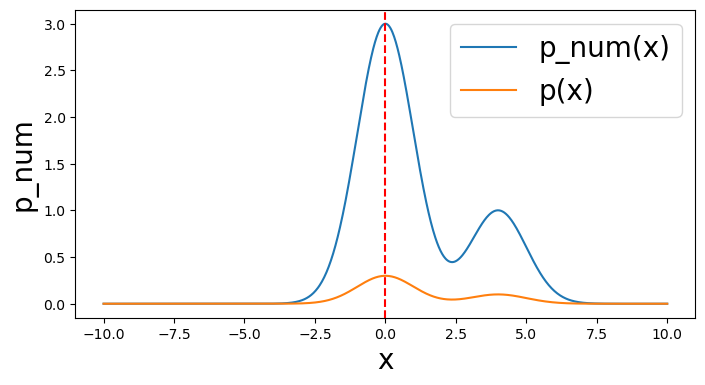

In [4]:
# p_num (numerator) and p are proportional. so say, P is only known to us up to a proportionality constant.
x_vals =  np.linspace(-10, 10, 1000)
p_num =  p(x_vals)
p_vals =  p_num/NC


plt.figure(figsize=(8,4))
plt.plot(x_vals, p_num)
plt.plot(x_vals, p_vals)
plt.legend(['p_num(x)', 'p(x)'], fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('p_num', fontsize=20)
plt.axvline(0, color='r', linestyle='--')

### Rejection Sampling
$q(x)$ - Proposal distribution (easy to compute and close to the target distribution)/

For a $Mq(x) > P(x)\,\,\forall\,\,x \in \mathbb{R}$, the rejection sampling can be done as follows.
* Sample $x_i \sim q(x)$
* Sample $u_i \sim\mathit{Uniform}[0, Mq(x_i)]$
* Accept $x_i$ if $u_i < P(x_i)$    


Lets choose $q = \mathcal{N}(1,4^2)$

In [5]:
def q_x(x, mu, sigma):
    return (1/np.sqrt(2*np.pi*(sigma**2))*np.exp(-(x-mu)**2/(2.*sigma**2)))

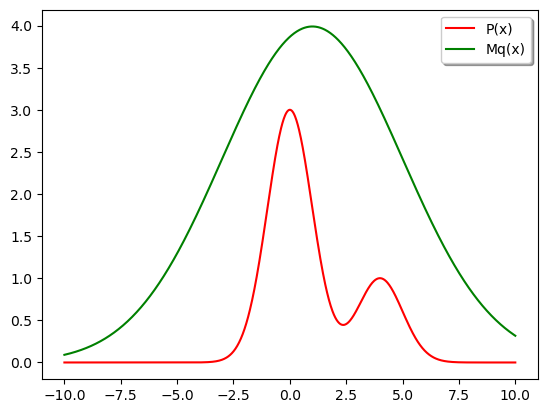

In [7]:
q = q_x(x_vals, 1, 4)
M= 40 #choose the appropriate value of M
plt.figure(3)
plt.plot(x_vals, p_num, 'r', label='P(x)')
plt.plot(x_vals, M*q , 'g', label='Mq(x)')
plt.legend(loc='upper right', shadow=True)
plt.show()

In [8]:
n_samples = 100000

'''
samples = []
for i in range(n_samples):
    candidate = np.random.normal(1, 4)
    P_x = P(candidate)
    u = np.random.uniform(0, M*q_x(candidate, 1, 4))
    if u < P_x:
        samples.append(candidate)

'''

samples = []
for i in range(n_samples):
    candidate = np.random.normal(1, 4)     #sample a candidate    
    prob_accept=   p(candidate)/ (M*q_x(candidate, 1, 4)) #fill code
    if np.random.random() < prob_accept:
        samples.append(candidate)

Compute the histogram of samples from Rejection Sampling and compare it with normalized $P(x)$. It's clear that rejection sampling generates samples from underlying normalized $P(x)$.

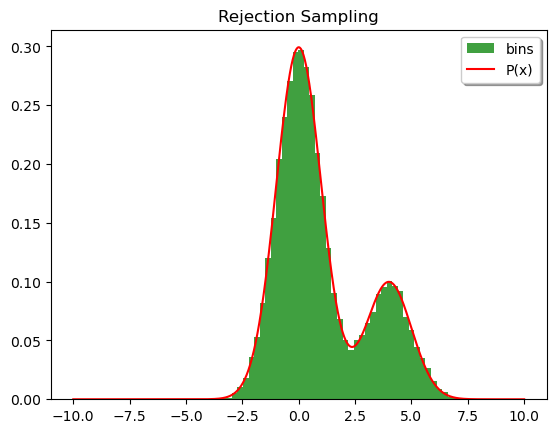

In [9]:
plt.hist(samples, bins=50, histtype='bar', facecolor='g', alpha=0.75, density=1, label='bins')
plt.plot(x_vals, p_vals, 'r', label='P(x)')
plt.title('Rejection Sampling')
plt.legend(loc='upper right', shadow=True)
plt.show()

In [10]:
print("Num Samples Collected: %s"%len(samples))

print("Efficiency: %s"%round(len(samples) / n_samples, 3))

Num Samples Collected: 24939
Efficiency: 0.249


Text(0.5, 1.0, 'Correlation: -0.0')

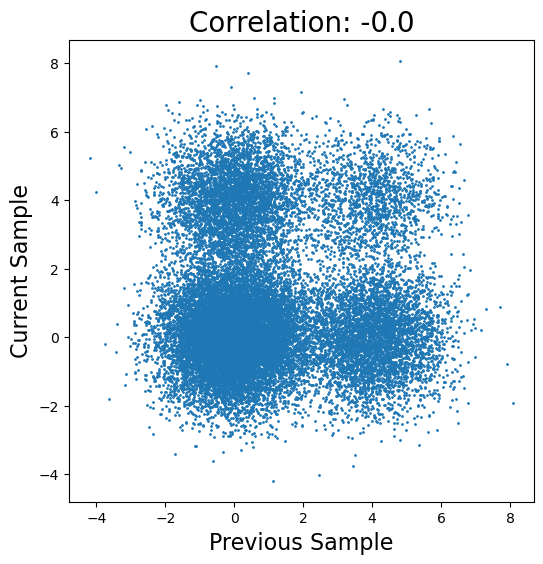

In [11]:
plt.figure(figsize=(6,6))
plt.scatter(samples[:-1], samples[1:], s=1)
plt.xlabel('Previous Sample', fontsize=16)
plt.ylabel('Current Sample', fontsize=16)
corr = round(stats.pearsonr(samples[:-1], samples[1:])[0], 2)
plt.title('Correlation: %s'%corr, fontsize=20)

### Metropolis Hastings
For any $p(x)$, the Metropolis-Hastings algorithm proceeds as follows.
* Start at some $x_t = x_0$.
* Sample $x_i \sim q(x|x_t)$
* $A = \min\Big(\frac{p(x_i)q(x_t|x_i)}{p(x_t)q(x_i|x_t)},1\Big)$
* Sample $k_i \sim Uniform[0,1]$
    * if $k_i < A$ then $x_{t+1} = x_i$
    * else $x_{t+1} = x_t$
    
As $t \rightarrow \infty$, $x_t$ comes from a normalized $p(x)$. The Markov chain takes some time to stabilize which is the burn-in (or warm up) phase. In the following code we ignore the first 1000 samples as burn-in.   

Here we choose $q(x|x_t)$ as $\mathcal{N}(x_t, 1)$ which is actually equal to $q(x_t|x)$ and should cancel (numerator to denominator) but let's keep it in the code for clarity.

In [12]:
q = lambda t1, t0: np.exp(-(t1 - t0)**2/2)/(np.sqrt(2 * np.pi))
x0 = 0
xt = x0
n_samples = 100000
samples = []
num_accept=0
for i in range(n_samples):
    xt_candidate = np.random.normal(xt, 1)
    accept_prob = min(1, (p(xt_candidate) * q(xt, xt_candidate))/(p(xt) * q(xt_candidate, xt))) #fill code
    k_i= np.random.random()
    if k_i < accept_prob:
        xt = xt_candidate
        num_accept += 1
    samples.append(xt)
    
burn_in = 1000
samples = np.array(samples[burn_in:])

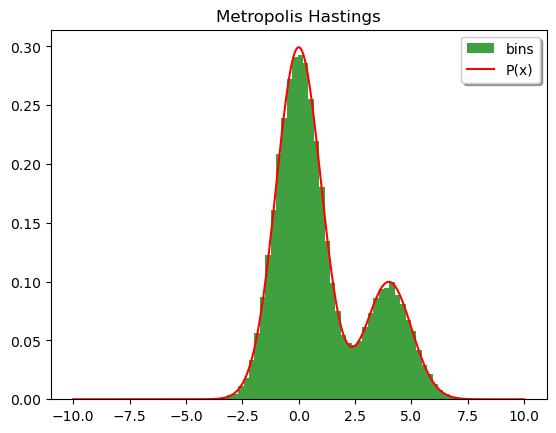

In [13]:
plt.hist(samples, bins=50, histtype='bar', facecolor='g', alpha=0.75, density=1, label='bins')
plt.plot(x_vals, p_vals, 'r', label='P(x)')
plt.title('Metropolis Hastings')
plt.legend(loc='upper right', shadow=True)
plt.show()

Text(0.5, 1.0, 'Correlation: 0.93')

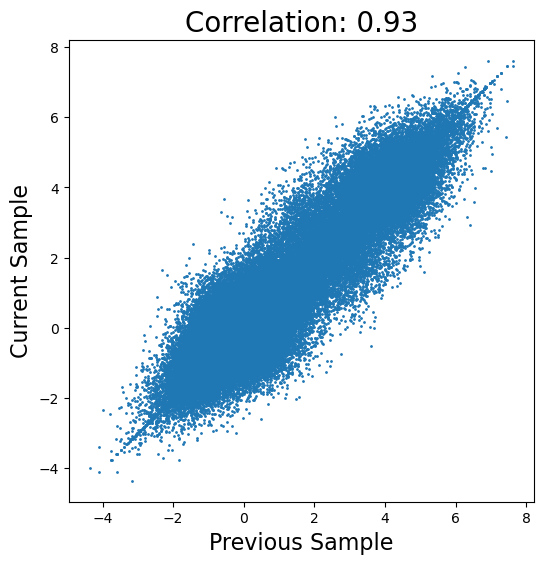

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(samples[:-1], samples[1:], s=1)
plt.xlabel('Previous Sample', fontsize=16)
plt.ylabel('Current Sample', fontsize=16)
corr = round(stats.pearsonr(samples[:-1], samples[1:])[0], 2)
plt.title('Correlation: %s'%corr, fontsize=20)

In [15]:
print("Fraction Acceptances: %s"%(num_accept /n_samples))

Fraction Acceptances: 0.74639


### Gibbs Sampling

Gibbs sampling is very useful to sample from multivariate distributions: it reduces the complex problem of sampling from a joint distribution to sampling from the full conditional (meaning, conditioned on all other variables) distribution of each variable. That means that to sample from, say, $p(x,y)$ , it is sufficient to be able to sample from $p(x|y)$  and $p(y|x)$, which might be considerably easier.


For a multivariate distribution, $P(X)$, $X =  \begin{bmatrix}x_1 \\x_2 \end{bmatrix}$, Gibbs Sampling is performed as follows. It is assumed that it's difficult to sample from the joint distribution $P(x_1,x_2)$ but it's possible to sample from the conditional distributions $P(x_1|x_2)$ and $P(x_2|x_1)$.
* Start at some $X^t = \begin{bmatrix}x_1^0 \\x_2^0 \end{bmatrix}$
* Sample $x^{t+1}_1 \sim P(x_1|x_2^t)$
* Sample $x^{t+1}_2 \sim P(x_2|x^{t+1}_1)$
* $X^{t+1} = \begin{bmatrix}x^{t+1}_1 \\x^{t+1}_2 \end{bmatrix}$

Remove the first few samples as burn-in values.

#### Goal: Sample from bivariate Normal

Let $$P(X) = P(x_1,x_2) = \frac{1}{\sqrt{|2\pi\Sigma|}}e^{-\frac{1}{2}(X-\mu)^T\Sigma^{-1}(X-\mu)}$$
Where $\mu = \begin{bmatrix}0 \\0 \end{bmatrix}$ and $\Sigma = \begin{bmatrix}1 & b \\b & 1 \end{bmatrix}$ and $X =  \begin{bmatrix}x_1 \\x_2 \end{bmatrix}$ and $b = 0.5$    
The conditional probabilities are then given by
$$P(x_1|x_2) = \mathcal{N}(bx_2, 1-b^2)$$
$$P(x_2|x_1) = \mathcal{N}(bx_1, 1-b^2)$$

In [16]:
b=0.5
numpy_samples = np.random.multivariate_normal([0,0], [[1, b], [b,1]], 10000)

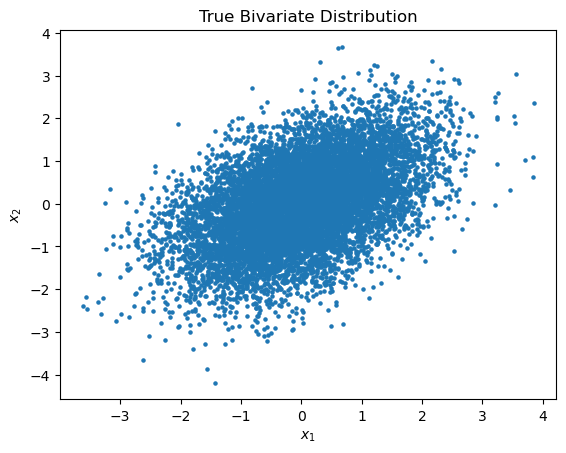

In [17]:
plt.scatter(numpy_samples[:,0], numpy_samples[:,1], s=5)
plt.title('True Bivariate Distribution')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [18]:
x0 = [0, 0]
xt = x0
samples = []
for i in range(100000):
    x1_t = np.random.normal(b*xt[1], 1-b*b)
    x2_t = np.random.normal(b*x1_t, 1-b*b)
    xt = [x1_t, x2_t]
    samples.append(xt)
burn_in = 1000
samples = np.array(samples[burn_in:])

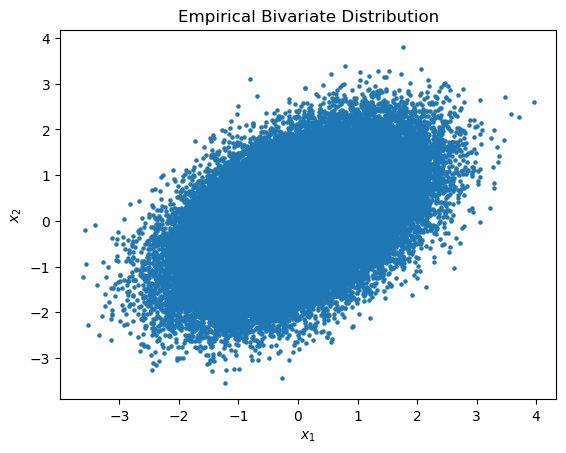

In [19]:
plt.scatter(samples[:,0], samples[:,1], s=5)
plt.title('Empirical Bivariate Distribution')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

Verify the samples with marginal distributions along both coordinates.

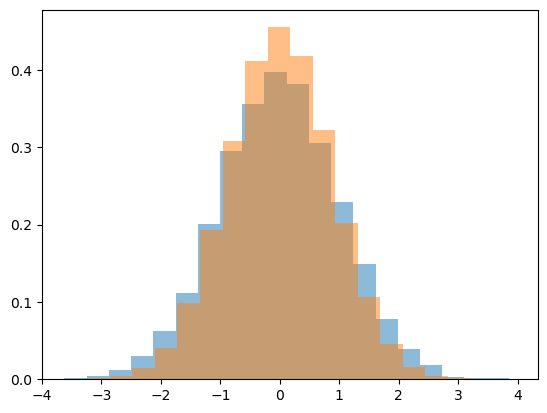

In [20]:
plt.hist(numpy_samples[:,0], bins=20, density=True, alpha=0.5)
plt.hist(samples[:,0], bins=20, density=True, alpha=0.5)
None

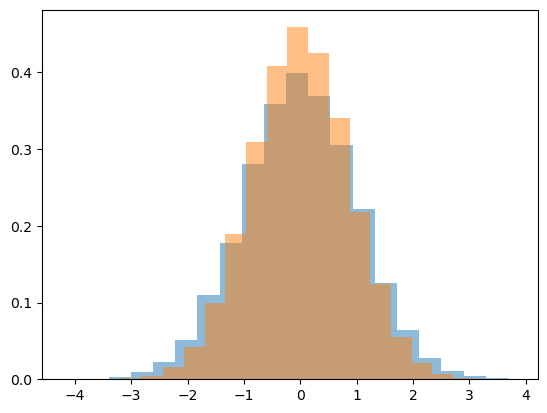

In [21]:
plt.hist(numpy_samples[:,1], bins=20, density=True, alpha=0.5)
plt.hist(samples[:,1], bins=20, density=True, alpha=0.5)
None

-0.0010393535919667701


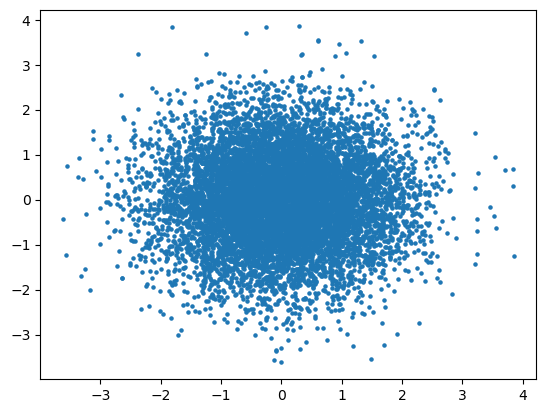

In [22]:
plt.scatter(numpy_samples[:-1,0], numpy_samples[1:,0], s=5)
print(stats.pearsonr(numpy_samples[:-1,0], numpy_samples[1:,0])[0])

0.24713509266397227


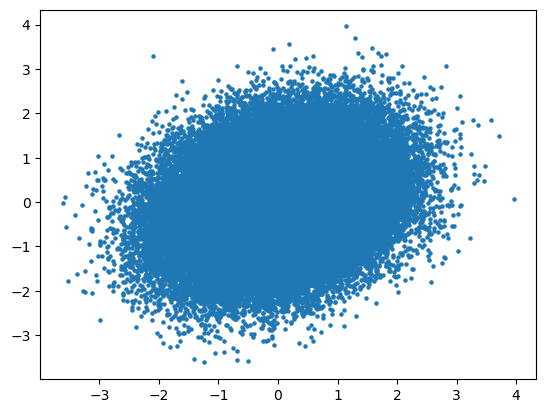

In [23]:
plt.scatter(samples[:-1,0], samples[1:,0], s=5)
print(stats.pearsonr(samples[:-1,0], samples[1:,0])[0])

**Reference**

https://www.youtube.com/watch?v=3Mw6ivkDVZc

https://astrostatistics.psu.edu/su14/lectures/cisewski_is.pdf`m